In [ ]:
!nvidia-smi

Thu Sep  5 05:28:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
! pip install -q supervision

In [ ]:
!pip install opencv-python-headless torch torchvision torchaudio
!pip install -q git+https://github.com/THU-MIG/yolov10
!git clone https://github.com/THU-MIG/yolov10  # downloading repo for YOLOv10
%cd yolov10
!pip install -r requirements.txt

INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.0+cu121
    Uninstalling torchaudio-2.4.0+cu121:
      Successfully uninstalled torchaudio-2.4.0+cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
fatal: destination path 'yolov10' already exists and is not an empty directory.
/content/yolov10


In [ ]:
! pwd


/content/yolov10


In [ ]:
import os
import urllib.request

# Create a directory named 'weights'
os.makedirs("weights", exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
]

# Download each weight file to the 'weights' directory
for url in urls:
    urllib.request.urlretrieve(url, f"weights/{os.path.basename(url)}")
    print(f"Downloaded {url.split('/')[-1]}")

Downloaded yolov10n.pt
Downloaded yolov10s.pt
Downloaded yolov10m.pt
Downloaded yolov10b.pt
Downloaded yolov10x.pt


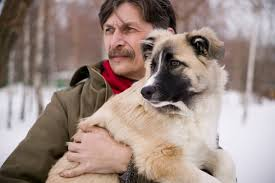

In [ ]:
#Inference with pretrained coco model
from IPython.display import Image

Image(filename = '/content/yolov10/images.jpeg',height=600)

In [ ]:

! yolo task = detect mode = predict conf = 0.25 save =True model = /content/yolov10/weights/yolov10m.pt source = /content/yolov10/images.jpeg

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16543024 parameters, 117600 gradients, 63.9 GFLOPs

image 1/1 /content/yolov10/images.jpeg: 448x640 1 0, 1 16, 105.3ms
Speed: 19.9ms preprocess, 105.3ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NZYN2LRZFCD7zOpdesVv")
project = rf.workspace("ai-yhf7s").project("ai-gy5cb")
version = project.version(1)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AI-1 in yolov9:: 100%|██████████| 714/714 [00:00<00:00, 5205.62it/s]


In [ ]:
!yolo task=detect mode=train epochs=25 batch=8 plots=True model=/content/yolov10/weights/yolov10m.pt data=/content/yolov10/AI-1/data.yaml

New https://pypi.org/project/ultralytics/8.2.87 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov10/weights/yolov10m.pt, data=/content/yolov10/AI-1/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

In [ ]:
!yolo task=detect mode=predict model=/content/yolov10/runs/detect/train3/weights/best.pt source=/content/yolov10/mouseimages.jpeg conf=0.25 save=True

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16464280 parameters, 0 gradients, 63.5 GFLOPs

image 1/1 /content/yolov10/mouseimages.jpeg: 640x640 (no detections), 35.4ms
Speed: 4.1ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
